In [18]:
# TO RUN IT: CHANGE MY PATH
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
# change path if necessary
import sys
my_path = r'/home/ilaria/Scrivania/Machine_Learning/Project_1/Project1_ML'
sys.path.insert(0,my_path + r'/code/COMMON')

# imports
import numpy as np 
import matplotlib.pyplot as plt

from proj1_helpers import predict_labels 
from implementations import *
from labels import idx_2labels
from costs import *
from optimize_hyperparams import *
from cross_validation import *
from step_wise import *
from extend_features import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build dataset

In [19]:
from proj1_helpers import load_csv_data 

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'/data/train.csv', sub_sample=False)

In [20]:
from outliers import handle_outliers

# handle outliers
X0, y = handle_outliers(input_data_raw, y_raw, -999, 'mean')

-999 are replaced by the mean value of the feature


In [21]:
# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

# Build features

In [22]:
# get feature names 
names = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])
log = True
degree = 1
X0, features = extend_features(X0, names, degree, log)

---------------------------
Features have been set to the power(s): [1]
16 Features of the momentum have been added
4 logarithmic features have been added.
Data have been standardized.
---------------------------


In [24]:
all_candidates = X0
print(X0.shape)
# standardize candidates to give to the stepwise
all_candidates ,_,_ = standardize(X0)

(250000, 50)


# Least Squares

In [25]:
# parameters
model = dict()
model['method'] = 'ls'
model['loss'] = 'rmse'

# R2 type
R2_method = 'McFadden' # or 'loss'

# estimate R2 error through cross validation (1 or 0)
cv = 1
model['k_fold'] = 10

# other
model['debug_mode'] = 1

In [8]:
# step-wise
best_R2adj, idx_features = stepwise(model, R2_method, all_candidates, features, y, cv)

cv: 1 L0: 1.8984104033e-05
R2adj_chosen: 0.0637731033786
--------------------------------------------------------------------------------------------
Feature chosen:  DER_mass_transverse_met_lep_power_1 (index : 1 ) |  R2adj =  0.0637731033786
R2adj_chosen: 0.0824436059668
--------------------------------------------------------------------------------------------
Feature chosen:  PRI_tau_pt_power_1 (index : 13 ) |  R2adj =  0.0824436059668
R2adj_chosen: 0.0962517530481
--------------------------------------------------------------------------------------------
Feature chosen:  DER_deltaeta_jet_jet_power_1 (index : 4 ) |  R2adj =  0.0962517530481
R2adj_chosen: 0.104081784951
--------------------------------------------------------------------------------------------
Feature chosen:  DER_met_phi_centrality_power_1 (index : 11 ) |  R2adj =  0.104081784951
R2adj_chosen: 0.110058574806
--------------------------------------------------------------------------------------------
Feature chos

In [9]:
import os
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0

In [10]:
# display selected features
results_r2_stepwise(best_R2adj[:len(best_R2adj)-1], idx_features)

step 1 : R2 adjusted = 0.0637731033786
step 2 : R2 adjusted = 0.0824436059668
step 3 : R2 adjusted = 0.0962517530481
step 4 : R2 adjusted = 0.104081784951
step 5 : R2 adjusted = 0.110058574806
step 6 : R2 adjusted = 0.127163487341
step 7 : R2 adjusted = 0.130916540143
step 8 : R2 adjusted = 0.132954746437
step 9 : R2 adjusted = 0.135065415278
step 10 : R2 adjusted = 0.136768454753
step 11 : R2 adjusted = 0.138306960121
step 12 : R2 adjusted = 0.139659447066
step 13 : R2 adjusted = 0.141753229311
step 14 : R2 adjusted = 0.145350974806
step 15 : R2 adjusted = 0.147053272348
step 16 : R2 adjusted = 0.14775733608
step 17 : R2 adjusted = 0.148451926441
step 18 : R2 adjusted = 0.149802171757
step 19 : R2 adjusted = 0.15121192241
step 20 : R2 adjusted = 0.151854091579
step 21 : R2 adjusted = 0.152753902389
step 22 : R2 adjusted = 0.15346643057
step 23 : R2 adjusted = 0.153637867871
step 24 : R2 adjusted = 0.153740564636
step 25 : R2 adjusted = 0.153826477167
step 26 : R2 adjusted = 0.15386936

In [14]:
best_R2adj

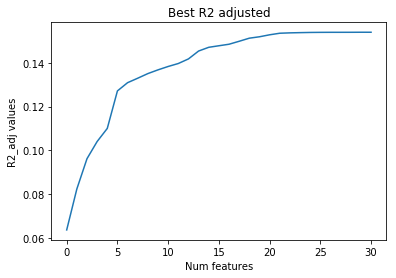

In [15]:
plt.plot(best_R2adj)
plt.title('Best R2 adjusted')
plt.xlabel('Num features')
plt.ylabel('R2_adj values')
plt.show()
plt.savefig("R2LS")

# Cross validation with feature selected

### Degree optimization + training/testing losses

tested degree:  [1 2 3 4 5 6 7] 

------------------------------------------ cross validation with degree =  1
------------------------------------------ cross validation with degree =  2
------------------------------------------ cross validation with degree =  3
------------------------------------------ cross validation with degree =  4
------------------------------------------ cross validation with degree =  5
------------------------------------------ cross validation with degree =  6
------------------------------------------ cross validation with degree =  7
Optimal degree:  1
Associated testing loss:  0.401503635094 



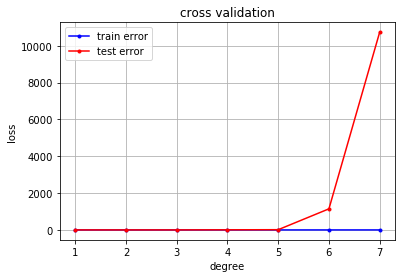

In [26]:
# ------------------------------- BUILD THE MODEL WITH THE SELECTED FEATURES 
X = X0[:,idx_features]

# Set parameters
model['initial_w'] = np.zeros(X.shape[1])
#model['debug_mode'] = 1
deg_min = 1
deg_max = 7
deg_steps = 1


w_tr_tot, loss_tr_tot, loss_te_tot, deg_opt, success_rate  = optimize_degree(y, X, deg_min, deg_max, deg_steps, model, debug_mode=1)


In [27]:
mean_tr = np.mean(loss_tr_tot)
mean_te = np.mean(loss_te_tot)
var_tr = np.var(loss_tr_tot)
var_te = np.var(loss_te_tot)

print("TRAINING:")
print('Mean = ', mean_tr, ' | Var = ', var_tr)
print('---------------------------------------------------')
print("TESTING:")
print('Mean = ', mean_te, ' | Var = ', var_te)
print('\n')
print("Success Rate : ", success_rate)

TRAINING:
Mean =  0.401438462358  | Var =  0.0
---------------------------------------------------
TESTING:
Mean =  0.401503635094  | Var =  0.0


Success Rate :  0.817472


In [10]:
print("Optimum degree : ", deg_opt)

Optimum degree :  1


# Least Squares Gradient Descent

## Build features

In [11]:
X0, y = handle_outliers(input_data_raw, y_raw, -999, 'mean')
# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

# get feature names 
names = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])
log = True
degree = 1
X0, features = extend_features(X0, names, degree, log)

-999 are replaced by the mean value of the feature
---------------------------
Features have been set to the power(s): [1]
16 Features of the momentum have been added
4 logarithmic features have been added.
Data have been standardized.
---------------------------


In [12]:
all_candidates = X0
all_candidates, _,_ = standardize(X0)
all_candidates.shape

(250000, 50)

In [28]:
# parameters
model = dict()
model['method'] = 'lsgd'
model['loss'] = 'rmse'

# hyperparameters
model['max_iters'] = 5000
model['gamma'] = 1e-1
model['threshold'] = 1e-4


# other
model['debug_mode'] = 1

# R2 type
R2_method = 'McFadden' # 'loss' or 'McFadden' 

# estimate R2 error through cross validation (1 or 0)
cv = 0
model['k_fold'] = 10

In [8]:
# step-wise
best_R2adj, idx_features = stepwise(model, R2_method, all_candidates, features, y, cv)

cv: 0 L0: 0.761686775001
R2adj_chosen: 0.032080734647
--------------------------------------------------------------------------------------------
Feature chosen:  DER_mass_transverse_met_lep_power_1 (index : 1 ) |  R2adj =  0.032080734647
R2adj_chosen: 0.0411457871052
--------------------------------------------------------------------------------------------
Feature chosen:  PRI_tau_pt_power_1 (index : 13 ) |  R2adj =  0.0411457871052
R2adj_chosen: 0.047707482843
--------------------------------------------------------------------------------------------
Feature chosen:  DER_deltaeta_jet_jet_power_1 (index : 4 ) |  R2adj =  0.047707482843
R2adj_chosen: 0.0513761628618
--------------------------------------------------------------------------------------------
Feature chosen:  DER_met_phi_centrality_power_1 (index : 11 ) |  R2adj =  0.0513761628618
R2adj_chosen: 0.0541417025747
--------------------------------------------------------------------------------------------
Feature chosen:

In [9]:
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0

In [10]:
# display selected features
results_r2_stepwise(best_R2adj[:len(best_R2adj)-1], idx_features)

step 1 : R2 adjusted = 0.032080734647
step 2 : R2 adjusted = 0.0411457871052
step 3 : R2 adjusted = 0.047707482843
step 4 : R2 adjusted = 0.0513761628618
step 5 : R2 adjusted = 0.0541417025747
step 6 : R2 adjusted = 0.0619475907676
step 7 : R2 adjusted = 0.0636665088003
step 8 : R2 adjusted = 0.0645855518551
step 9 : R2 adjusted = 0.0655361669295
step 10 : R2 adjusted = 0.0663095535959
step 11 : R2 adjusted = 0.0670022889179
step 12 : R2 adjusted = 0.0676204705879
step 13 : R2 adjusted = 0.0685645119608
step 14 : R2 adjusted = 0.0701485257306
step 15 : R2 adjusted = 0.0709021525033
step 16 : R2 adjusted = 0.0712193353282
step 17 : R2 adjusted = 0.0715283575503
step 18 : R2 adjusted = 0.0721312300666
step 19 : R2 adjusted = 0.072770971036
step 20 : R2 adjusted = 0.0730576035406
step 21 : R2 adjusted = 0.0734529298056
step 22 : R2 adjusted = 0.0737748002861
step 23 : R2 adjusted = 0.0738496146332
step 24 : R2 adjusted = 0.0738875038078
step 25 : R2 adjusted = 0.0739235903903
step 26 : R2

In [11]:
best_R2adj

[0.032080734647029034,
 0.04114578710522783,
 0.047707482843031272,
 0.051376162861800689,
 0.054141702574698788,
 0.061947590767608127,
 0.063666508800278757,
 0.064585551855095152,
 0.065536166929500247,
 0.066309553595891024,
 0.06700228891794785,
 0.067620470587868575,
 0.068564511960817726,
 0.070148525730631808,
 0.070902152503251492,
 0.071219335328213618,
 0.071528357550288024,
 0.072131230066565147,
 0.072770971035968732,
 0.073057603540599383,
 0.073452929805646286,
 0.073774800286083644,
 0.073849614633158242,
 0.073887503807815988,
 0.0739235903903359,
 0.073941879952660702,
 0.073951350536372543,
 0.07395343182058825,
 0.073955590206459781,
 0.073963602065776055,
 0.07396231018096501]

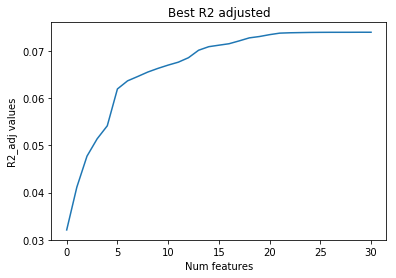

In [12]:
plt.plot(best_R2adj)
plt.title('Best R2 adjusted')
plt.xlabel('Num features')
plt.ylabel('R2_adj values')
plt.show()
plt.savefig("R2LS")

# Cross validation with feature selected

### Degree optimization

tested degree:  [1 2 3 4 5 6 7] 

------------------------------------------ cross validation with degree =  1
n_iter: 5000 , ||grad|| = 0.000461957425484


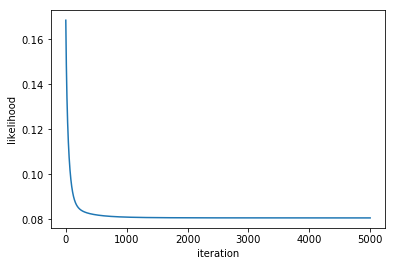

--------------------- final iteration


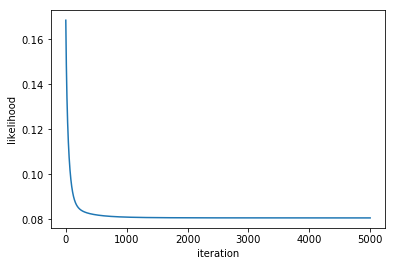

n_iter: 5000 , ||grad|| = 0.000447690177848


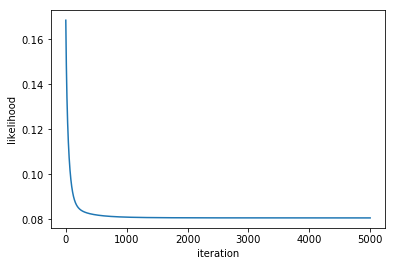

--------------------- final iteration


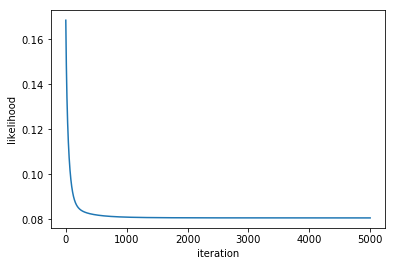

n_iter: 5000 , ||grad|| = 0.000476722594631


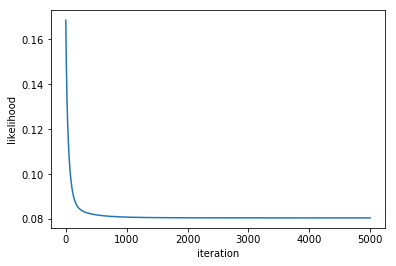

--------------------- final iteration


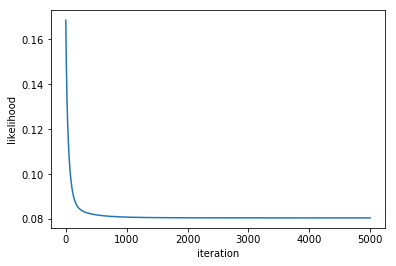

n_iter: 5000 , ||grad|| = 0.000437694884817


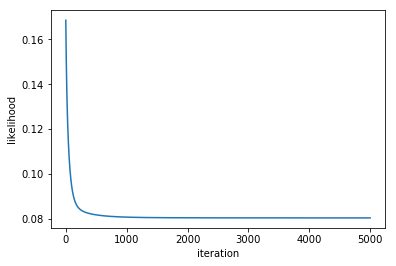

--------------------- final iteration


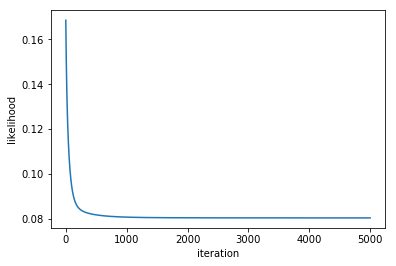

n_iter: 5000 , ||grad|| = 0.000443346308315


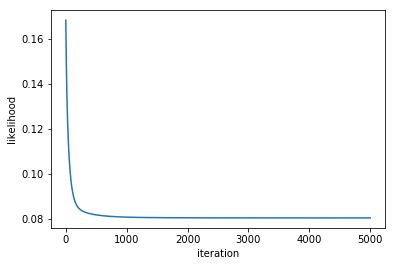

--------------------- final iteration


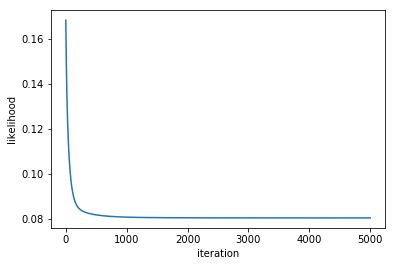

n_iter: 5000 , ||grad|| = 0.000452023945526


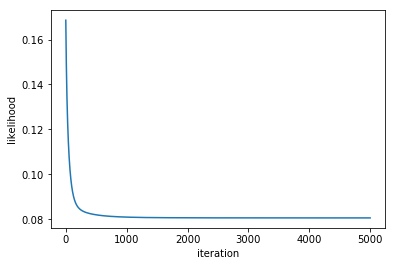

--------------------- final iteration


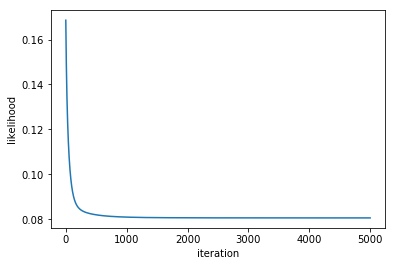

n_iter: 5000 , ||grad|| = 0.000437521120833


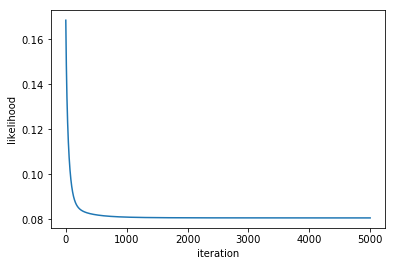

--------------------- final iteration


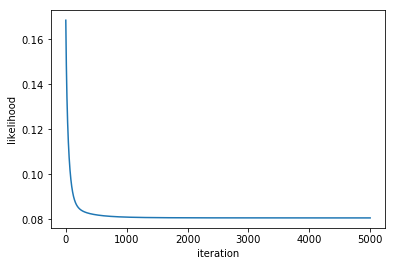

n_iter: 5000 , ||grad|| = 0.000439148326063


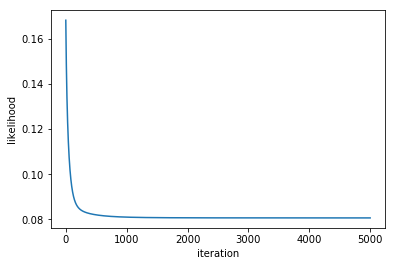

--------------------- final iteration


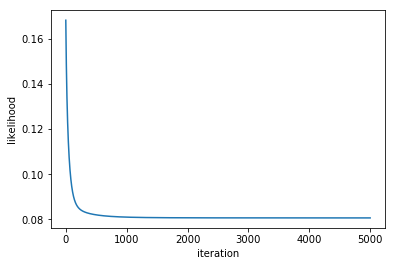

n_iter: 5000 , ||grad|| = 0.000457987261452


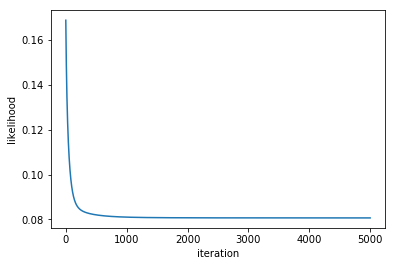

--------------------- final iteration


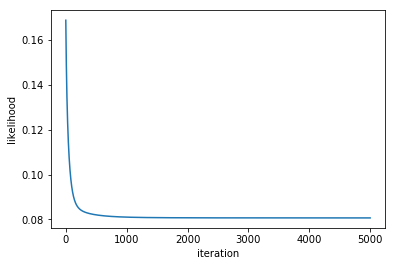

n_iter: 5000 , ||grad|| = 0.000484737857166


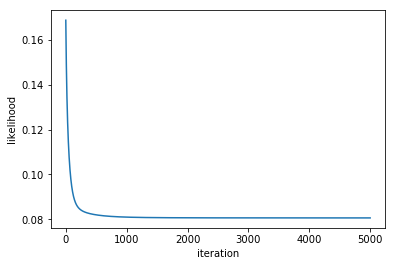

--------------------- final iteration


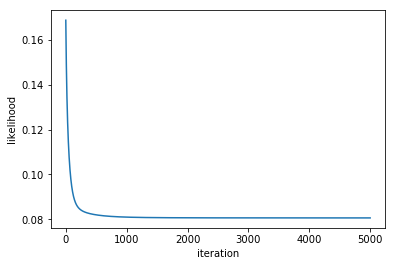

------------------------------------------ cross validation with degree =  2
n_iter: 5000 , ||grad|| = 0.00341308606326


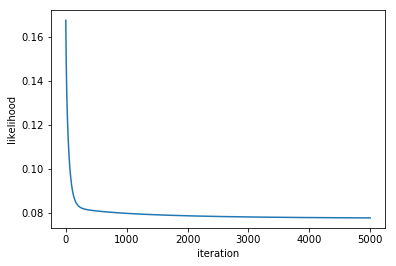

--------------------- final iteration


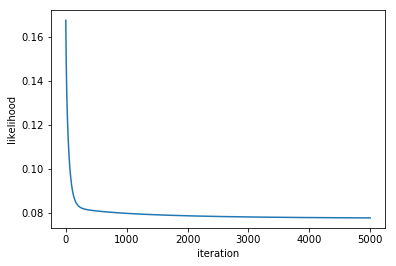

n_iter: 5000 , ||grad|| = 0.0034041343817


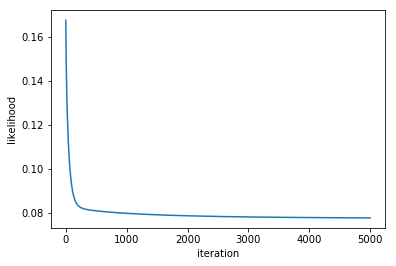

--------------------- final iteration


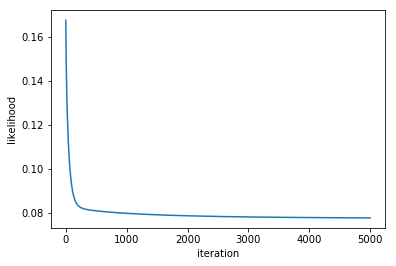

n_iter: 5000 , ||grad|| = 0.00340571709101


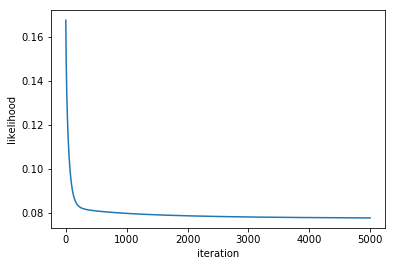

--------------------- final iteration


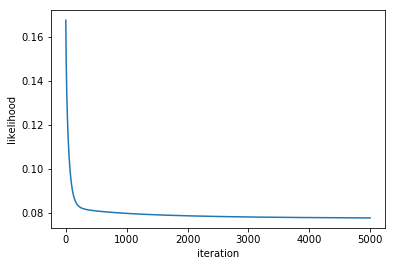

n_iter: 5000 , ||grad|| = 0.00348530840901


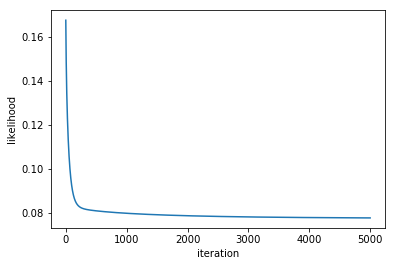

--------------------- final iteration


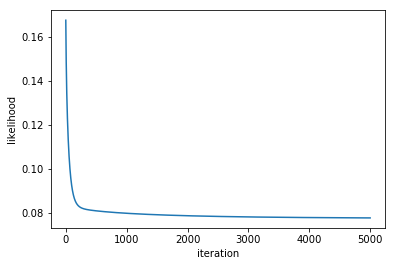

n_iter: 5000 , ||grad|| = 0.00339107338254


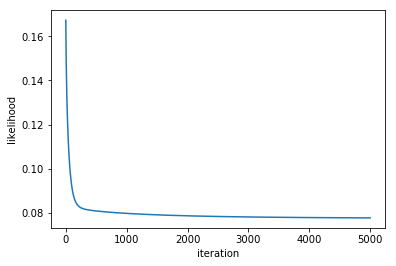

--------------------- final iteration


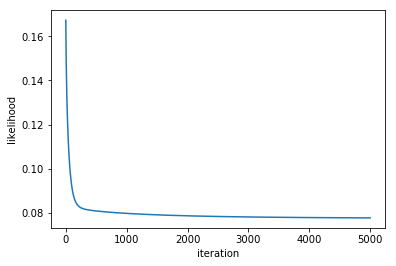

n_iter: 5000 , ||grad|| = 0.00339755325001


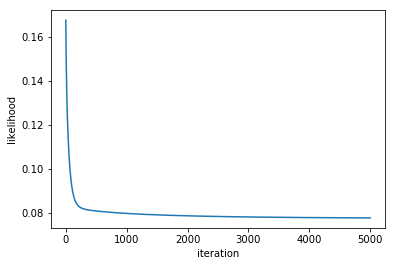

--------------------- final iteration


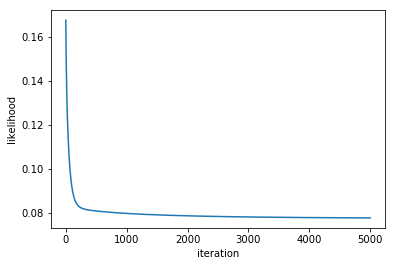

n_iter: 5000 , ||grad|| = 0.00355561901969


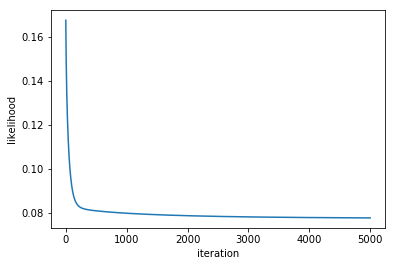

--------------------- final iteration


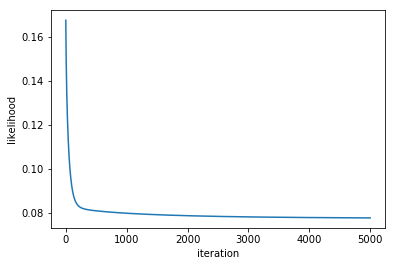

n_iter: 5000 , ||grad|| = 0.00343528591388


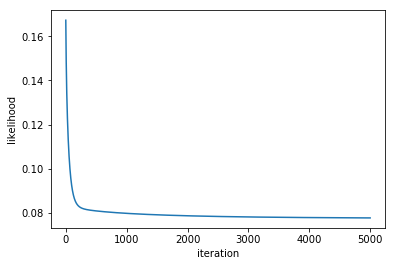

--------------------- final iteration


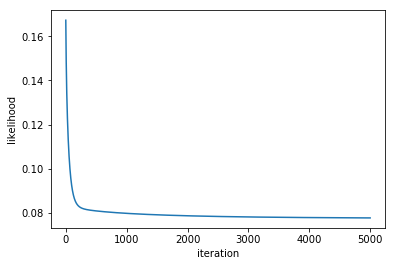

n_iter: 5000 , ||grad|| = 0.00337005140682


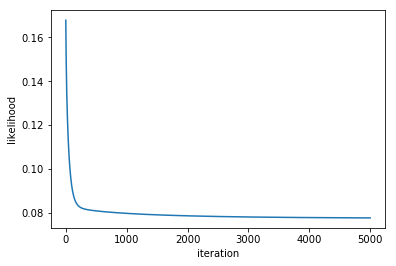

--------------------- final iteration


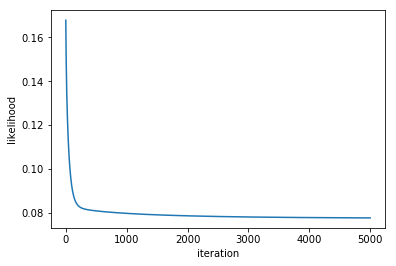

n_iter: 5000 , ||grad|| = 0.00337819075953


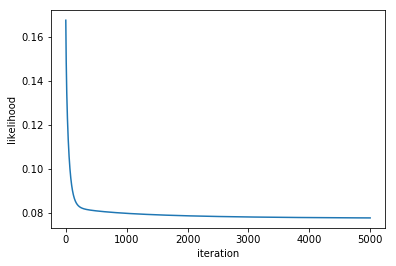

--------------------- final iteration


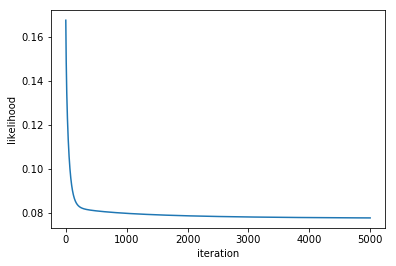

------------------------------------------ cross validation with degree =  3
n_iter: 5000 , ||grad|| = 0.00388272408334


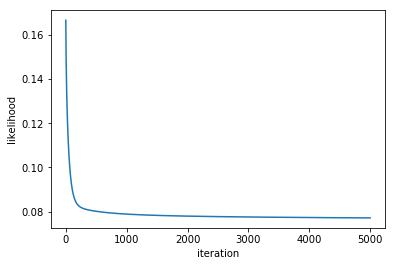

--------------------- final iteration


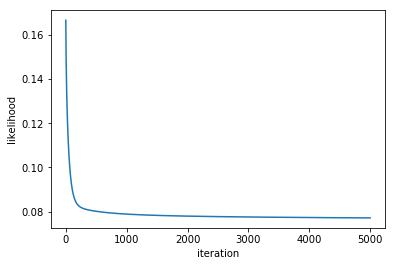

n_iter: 5000 , ||grad|| = 0.00391479105761


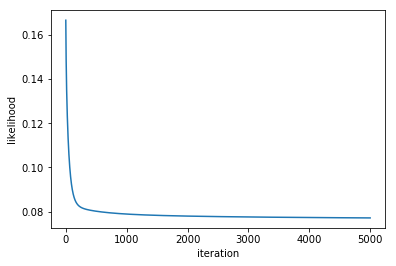

--------------------- final iteration


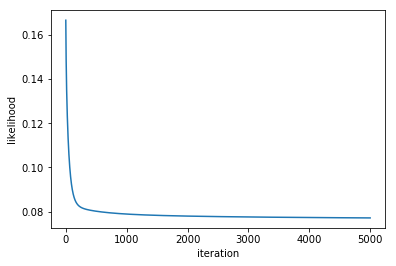

n_iter: 5000 , ||grad|| = 0.0038886644887


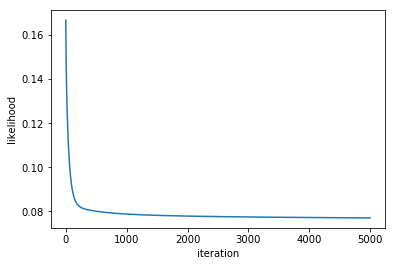

--------------------- final iteration


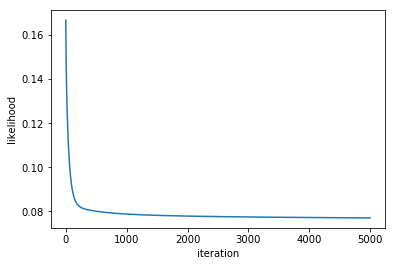

n_iter: 5000 , ||grad|| = 0.00389925748025


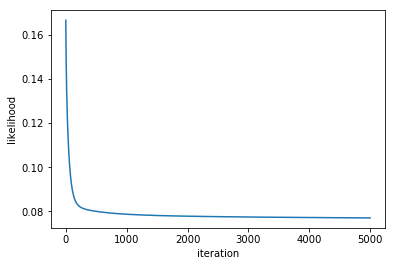

--------------------- final iteration


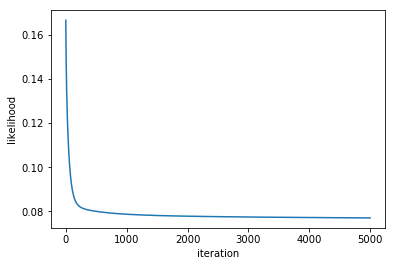

n_iter: 5000 , ||grad|| = 0.00387284447663


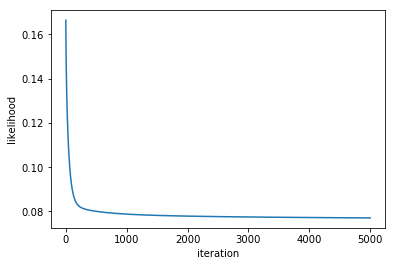

--------------------- final iteration


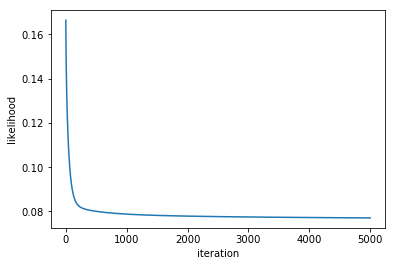

n_iter: 5000 , ||grad|| = 0.00393368268664


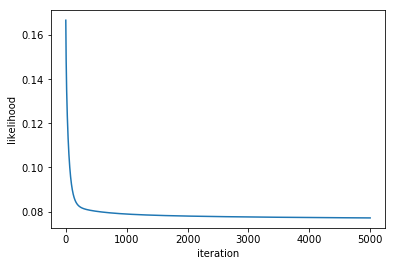

--------------------- final iteration


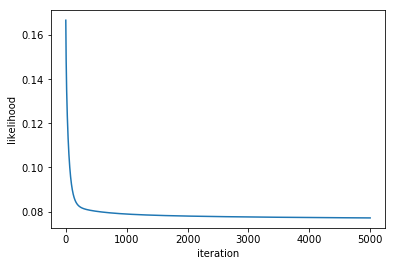

n_iter: 5000 , ||grad|| = 0.00383349769549


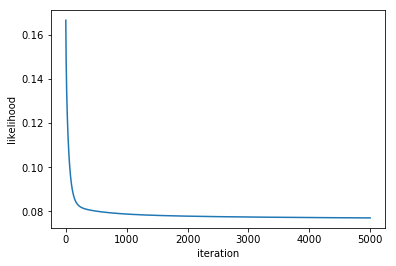

--------------------- final iteration


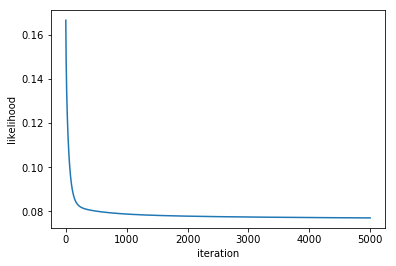

n_iter: 5000 , ||grad|| = 0.00394992792507


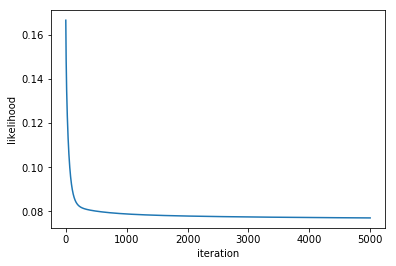

--------------------- final iteration


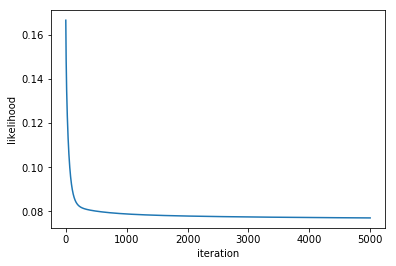

n_iter: 5000 , ||grad|| = 0.00390111895125


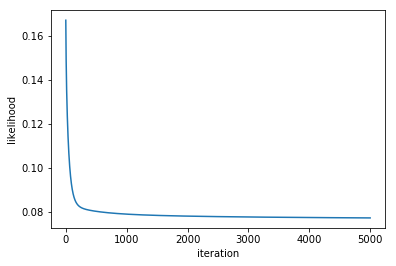

--------------------- final iteration


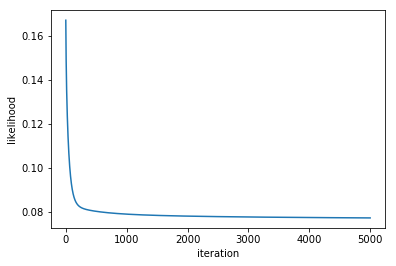

n_iter: 5000 , ||grad|| = 0.0039849899596


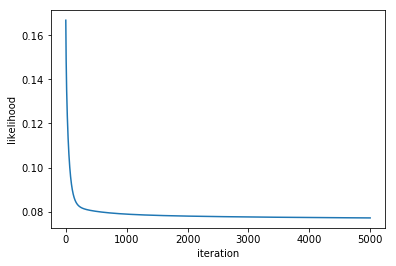

--------------------- final iteration


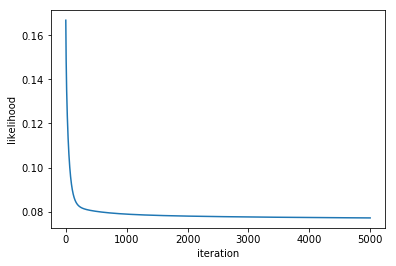

------------------------------------------ cross validation with degree =  4
n_iter: 5000 , ||grad|| = 0.00392964220889


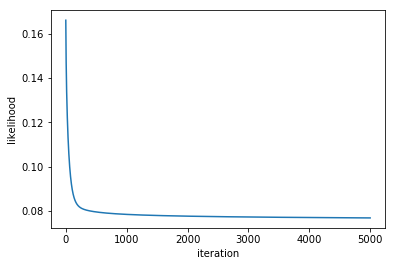

--------------------- final iteration


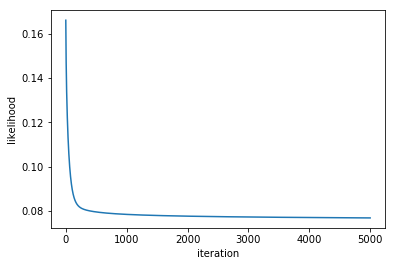

n_iter: 5000 , ||grad|| = 0.0039538435396


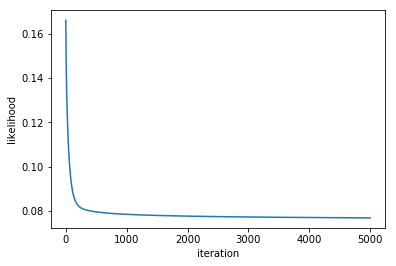

--------------------- final iteration


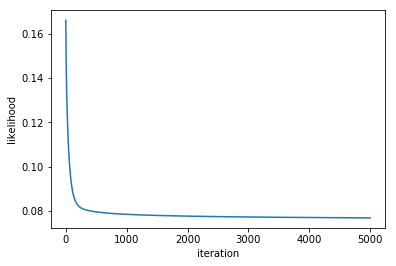

n_iter: 5000 , ||grad|| = 0.00390579463228


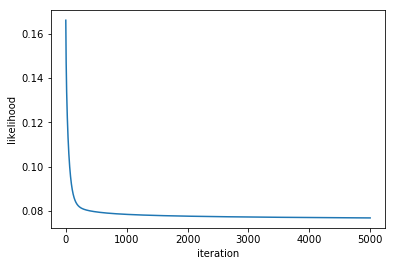

--------------------- final iteration


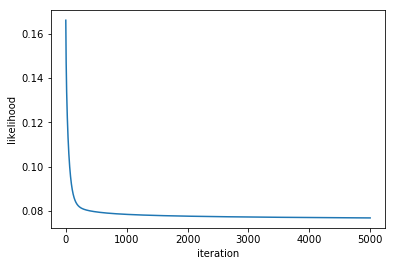

n_iter: 5000 , ||grad|| = 0.00396123513626


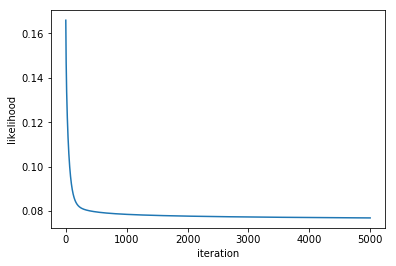

--------------------- final iteration


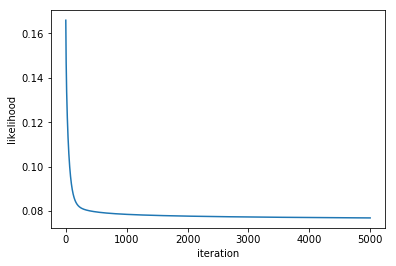

n_iter: 5000 , ||grad|| = 0.00395136066421


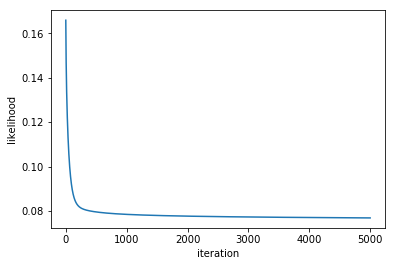

--------------------- final iteration


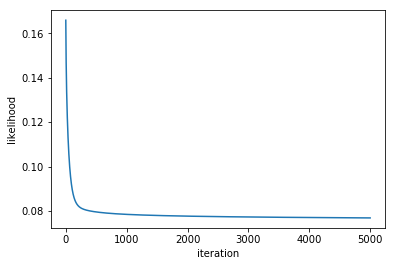

n_iter: 5000 , ||grad|| = 0.00394347059684


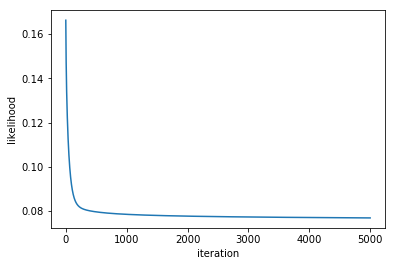

--------------------- final iteration


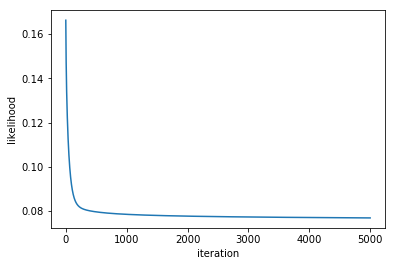

n_iter: 5000 , ||grad|| = 0.00398884001389


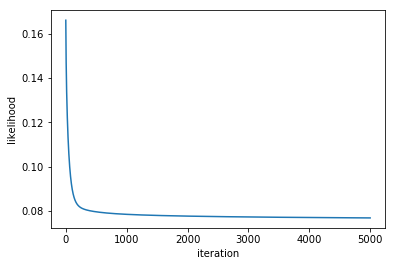

--------------------- final iteration


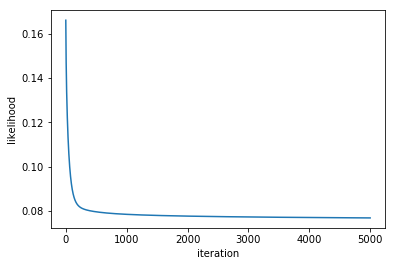

n_iter: 5000 , ||grad|| = 0.00392803778862


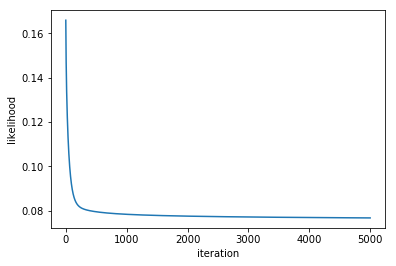

--------------------- final iteration


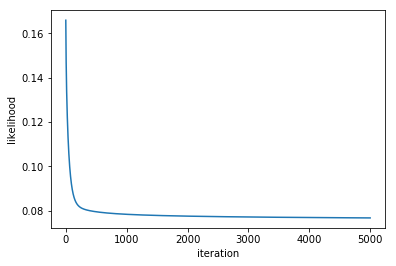

n_iter: 5000 , ||grad|| = 0.00397121392131


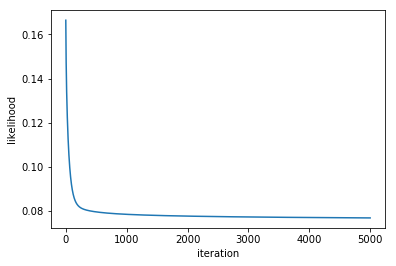

--------------------- final iteration


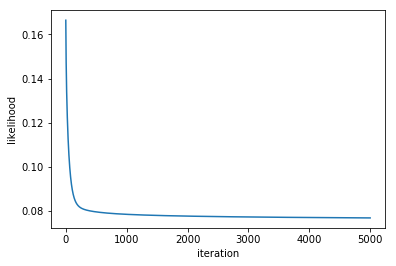

n_iter: 5000 , ||grad|| = 0.00394263901149


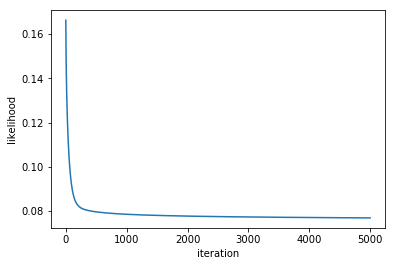

--------------------- final iteration


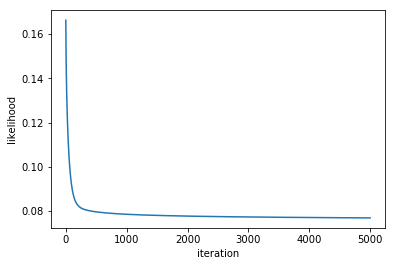

------------------------------------------ cross validation with degree =  5
n_iter: 5000 , ||grad|| = 0.00417756394806


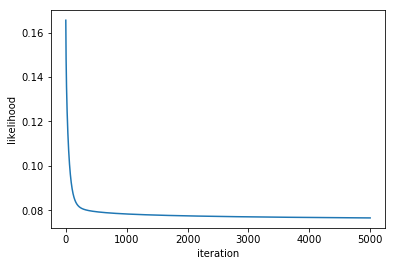

--------------------- final iteration


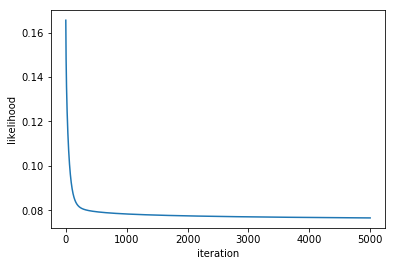

n_iter: 5000 , ||grad|| = 0.00416383468184


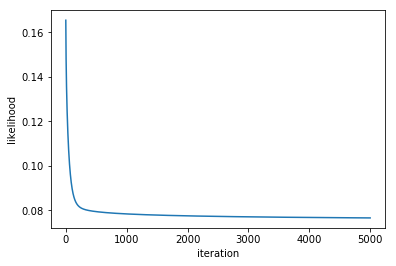

--------------------- final iteration


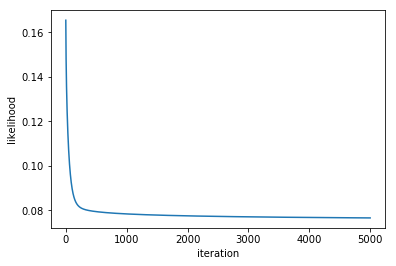

n_iter: 5000 , ||grad|| = 0.00416309705429


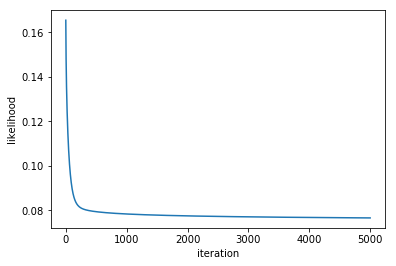

--------------------- final iteration


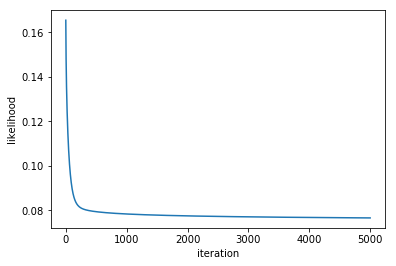

n_iter: 5000 , ||grad|| = 0.00427597158434


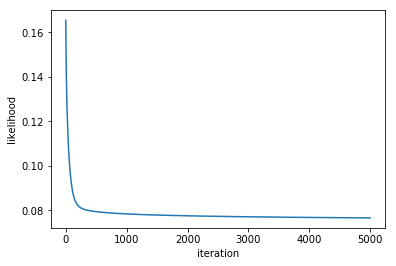

--------------------- final iteration


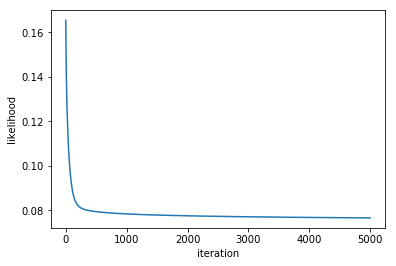

n_iter: 5000 , ||grad|| = 0.00416764657597


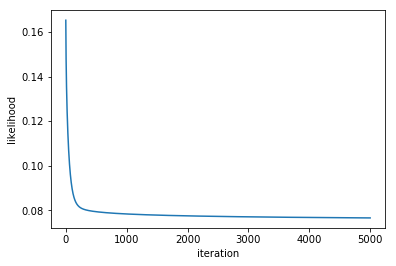

--------------------- final iteration


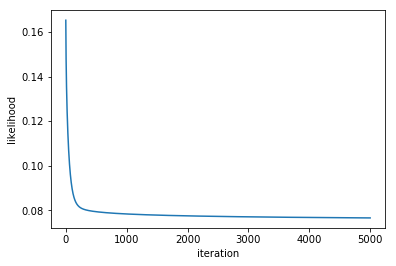

n_iter: 5000 , ||grad|| = 0.00419579759974


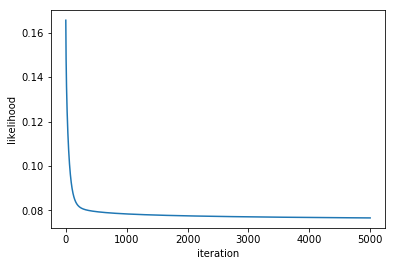

--------------------- final iteration


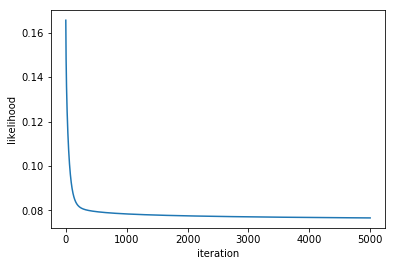

n_iter: 5000 , ||grad|| = 0.0042014892128


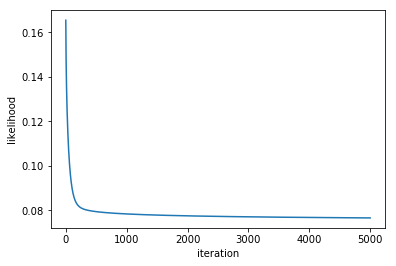

--------------------- final iteration


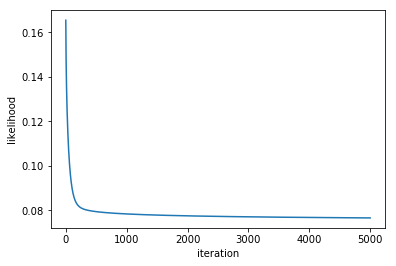

n_iter: 5000 , ||grad|| = 0.00416619397661


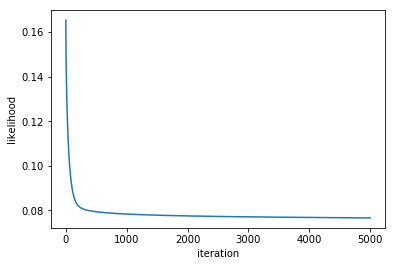

--------------------- final iteration


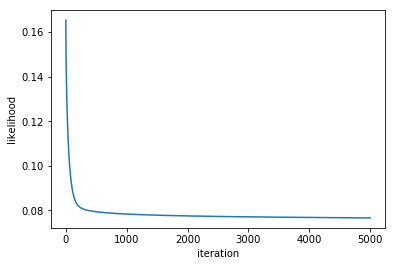

n_iter: 5000 , ||grad|| = 0.00412011300521


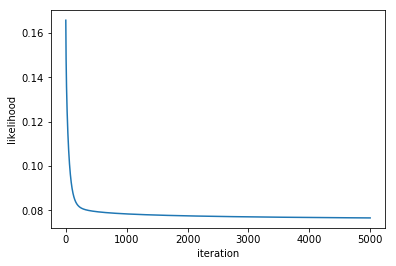

--------------------- final iteration


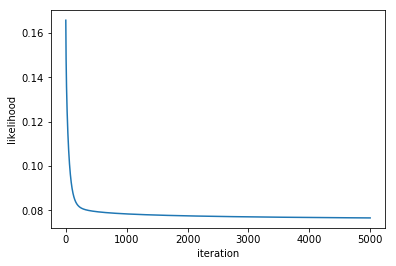

n_iter: 5000 , ||grad|| = 0.00413821894516


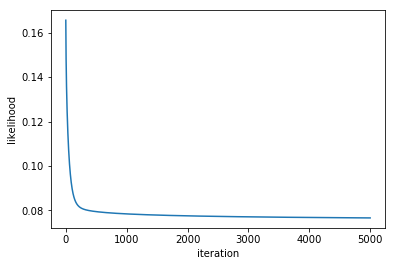

--------------------- final iteration


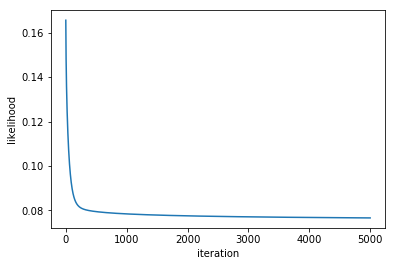

------------------------------------------ cross validation with degree =  6
n_iter: 5000 , ||grad|| = 0.00410197875608


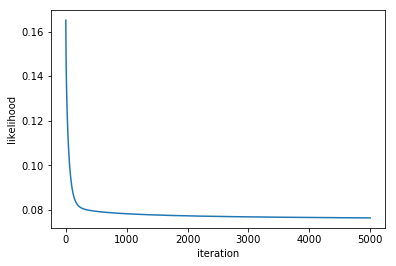

--------------------- final iteration


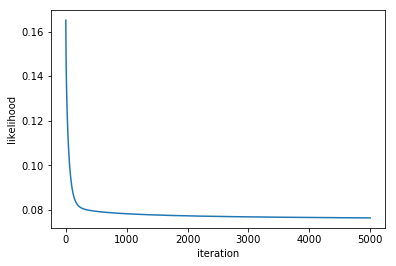

n_iter: 5000 , ||grad|| = 0.00408042926063


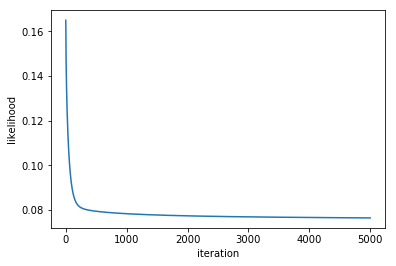

--------------------- final iteration


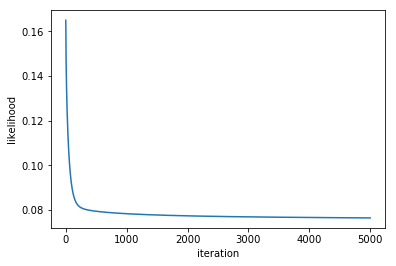

n_iter: 5000 , ||grad|| = 0.00410085031714


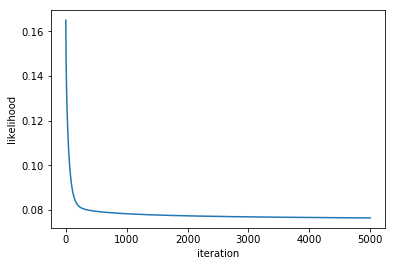

--------------------- final iteration


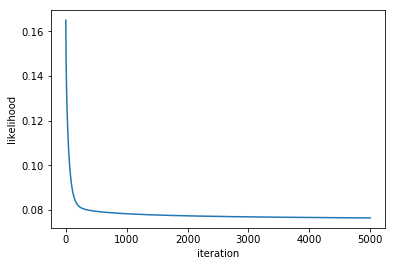

n_iter: 5000 , ||grad|| = 0.00416320117218


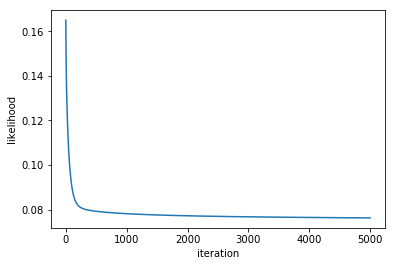

--------------------- final iteration


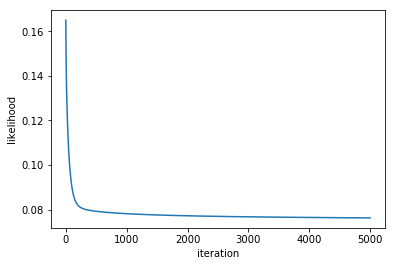

n_iter: 5000 , ||grad|| = 0.0040887136233


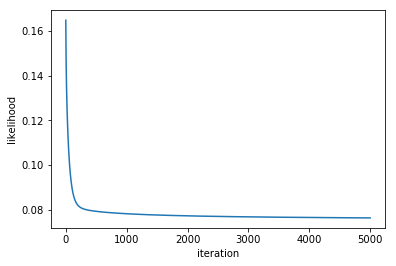

--------------------- final iteration


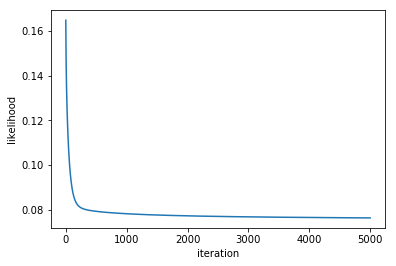

n_iter: 5000 , ||grad|| = 0.00412948613748


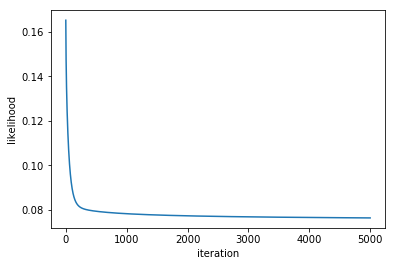

--------------------- final iteration


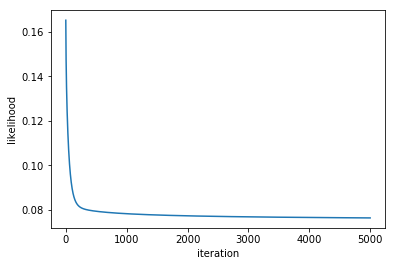

n_iter: 5000 , ||grad|| = 0.00415287341048


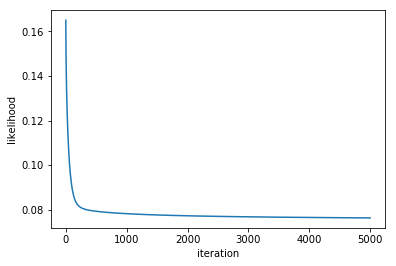

--------------------- final iteration


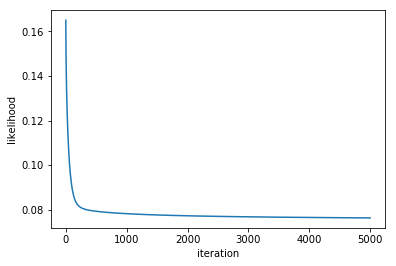

n_iter: 5000 , ||grad|| = 0.0042128745167


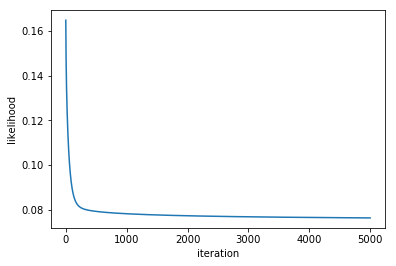

--------------------- final iteration


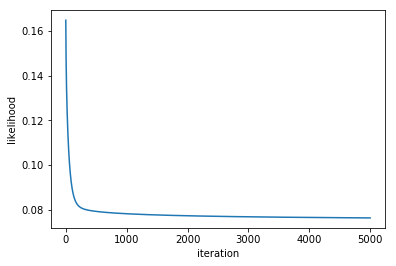

n_iter: 5000 , ||grad|| = 0.00397636305173


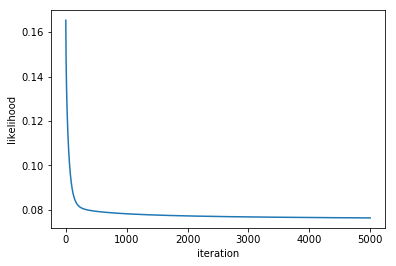

--------------------- final iteration


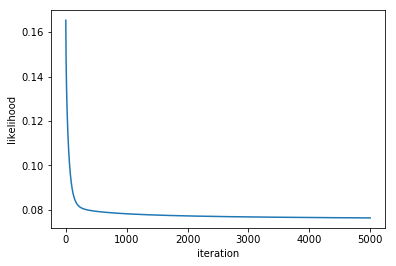

n_iter: 5000 , ||grad|| = 0.00402104795052


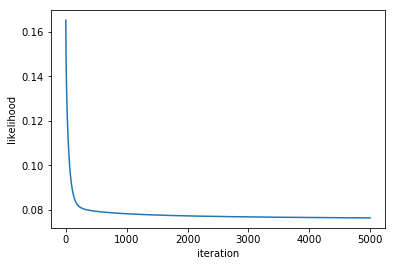

--------------------- final iteration


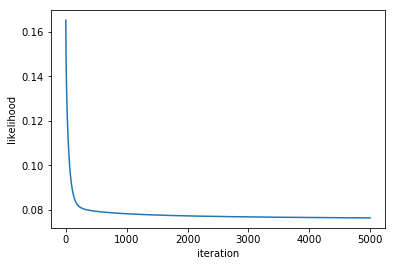

------------------------------------------ cross validation with degree =  7
n_iter: 5000 , ||grad|| = 0.00394488805888


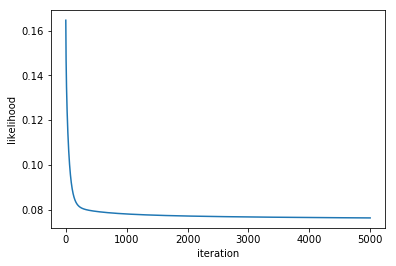

--------------------- final iteration


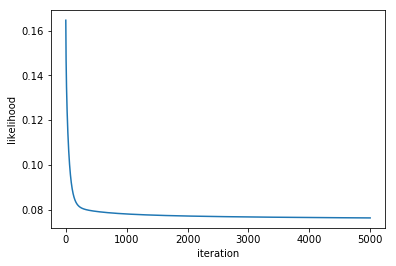

n_iter: 5000 , ||grad|| = 0.00393491381595


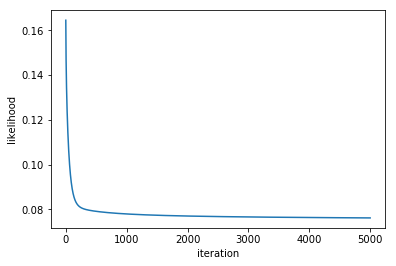

--------------------- final iteration


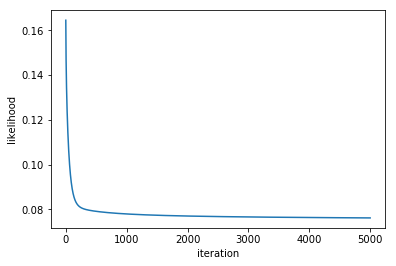

n_iter: 5000 , ||grad|| = 0.00395131013068


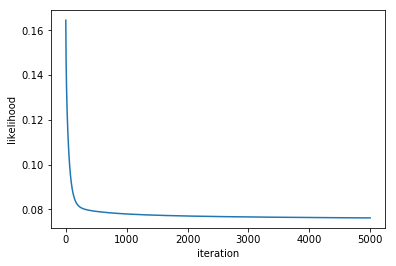

--------------------- final iteration


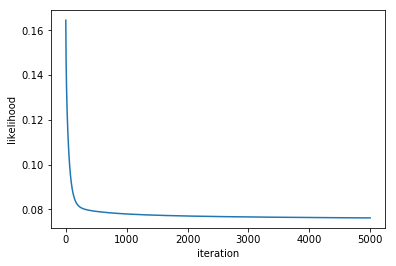

n_iter: 5000 , ||grad|| = 0.00398613806858


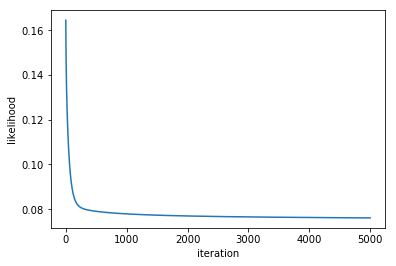

--------------------- final iteration


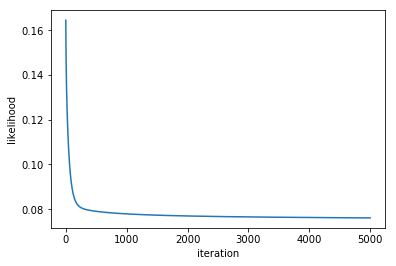

n_iter: 5000 , ||grad|| = 0.0039406053977


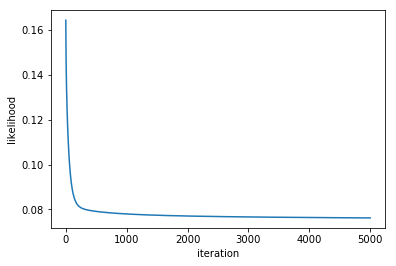

--------------------- final iteration


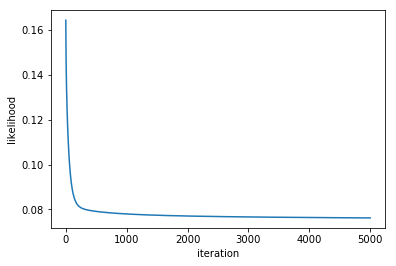

n_iter: 5000 , ||grad|| = 0.0039687924704


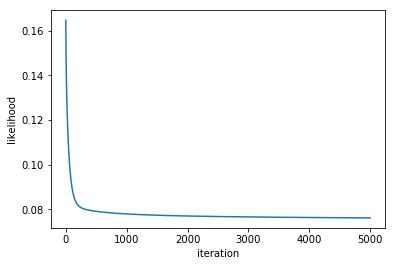

--------------------- final iteration


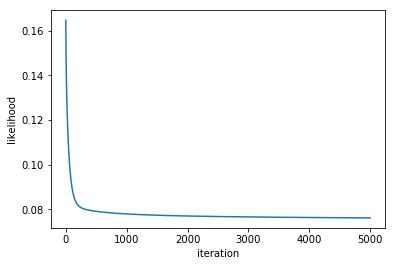

n_iter: 5000 , ||grad|| = 0.00400069698865


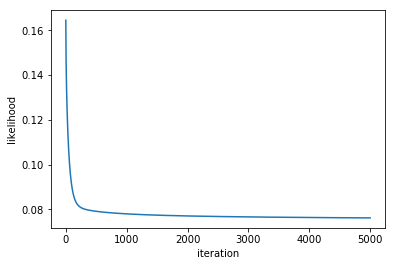

--------------------- final iteration


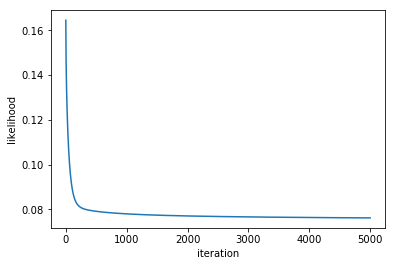

n_iter: 5000 , ||grad|| = 0.00407644337985


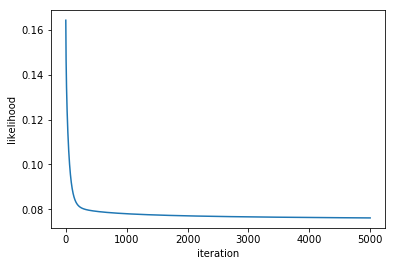

--------------------- final iteration


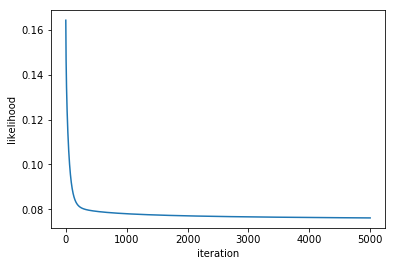

n_iter: 5000 , ||grad|| = 0.0038766180631


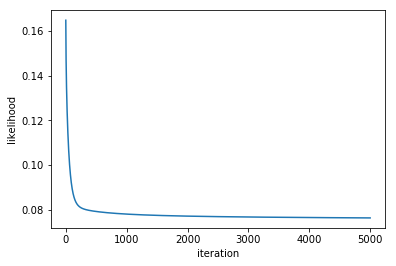

--------------------- final iteration


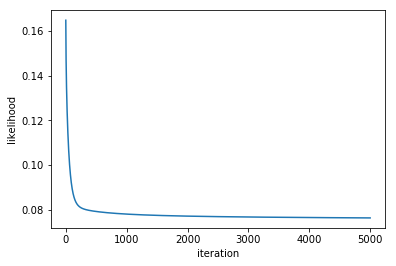

n_iter: 5000 , ||grad|| = 0.00388884614688


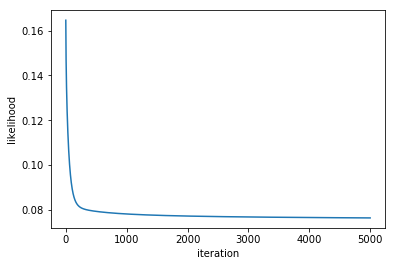

--------------------- final iteration


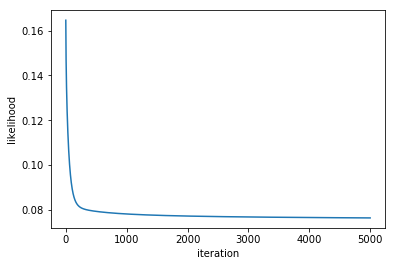

Optimal degree:  4
Associated testing loss:  0.396687442124 



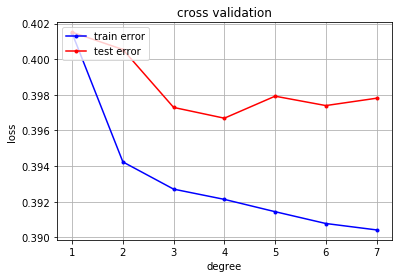

In [29]:
# ------------------------------- BUILD THE MODEL WITH THE SELECTED FEATURES 
X = X0[:,idx_features]

# Set parameters
model['initial_w'] = np.zeros(X.shape[1])
model['gamma'] = 1e-2
model['max_iters'] = 5000
model['debug_mode'] = 1
deg_min = 1
deg_max = 7
deg_steps = 1


w_tr_tot, loss_tr_tot, loss_te_tot, deg_opt, success_rate  = optimize_degree(y, X, deg_min, deg_max, deg_steps, model, debug_mode=1)
#w_tr_tot, loss_tr_tot, loss_te_tot, success_rate = cross_validation(y,X,model,debug_mode=1)

In [30]:
mean_tr = np.mean(loss_tr_tot)
mean_te = np.mean(loss_te_tot)
var_tr = np.var(loss_tr_tot)
var_te = np.var(loss_te_tot)

print("TRAINING:")
print('Mean = ', mean_tr, ' | Var = ', var_tr)
print('---------------------------------------------------')
print("TESTING:")
print('Mean = ', mean_te, ' | Var = ', var_te)
print('\n')
print("Success Rate : ", success_rate)

TRAINING:
Mean =  0.392131859286  | Var =  0.0
---------------------------------------------------
TESTING:
Mean =  0.396687442124  | Var =  0.0


Success Rate :  0.785144


In [31]:
deg_opt

4

In [75]:
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0

# Least Squares Stochastic Gradient Descent

## Build features 

In [76]:
X0, y = handle_outliers(input_data_raw, y_raw, -999, 'mean')
# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

# get feature names 
names = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])
log = True
degree = 1
X0, features= extend_features(X0, names, degree,log)

-999 are replaced by the mean value of the feature
---------------------------
Features have been set to the power(s): [1]
16 Features of the momentum have been added
4 logarithmic features have been added.
Data have been standardized.
---------------------------


In [77]:
all_candidates = X0
print(all_candidates.shape)
print(len(features))

(250000, 50)
50


In [78]:
# parameters
model = dict()
model['method'] = 'lssgd'
model['loss'] = 'rmse'

# hyperparameters
model['batch_size'] = 50
model['max_iters'] = 25
model['gamma'] = 1e-1
model['threshold'] = 1e-4

# other
model['debug_mode'] = 0

# R2 type
R2_method = 'McFadden' # 'loss', 'Tjur' or 'McFadden' 

# estimate R2 error through cross validation (1 or 0)
cv = 0
model['k_fold'] = 10

In [79]:
# step-wise
best_R2adj, idx_features = stepwise(model, R2_method, all_candidates, features, y, cv)

cv: 0 L0: 0.773442684808
R2adj_chosen: 0.0298678891268
--------------------------------------------------------------------------------------------
Feature chosen:  DER_met_phi_centrality_power_1 (index : 11 ) |  R2adj =  0.0298678891268
R2adj_chosen: 0.0419116482515
--------------------------------------------------------------------------------------------
Feature chosen:  PRI_tau_pt_power_1 (index : 13 ) |  R2adj =  0.0419116482515
R2adj_chosen: 0.0521134786493
--------------------------------------------------------------------------------------------
Feature chosen:  DER_deltaeta_jet_jet_power_1 (index : 4 ) |  R2adj =  0.0521134786493
R2adj_chosen: 0.0668740863506
--------------------------------------------------------------------------------------------
Feature chosen:  DER_deltar_tau_lep_power_1 (index : 7 ) |  R2adj =  0.0668740863506
R2adj_chosen: 0.0785923579749
--------------------------------------------------------------------------------------------
Feature chosen:  PRI

In [80]:
# display selected features
results_r2_stepwise(best_R2adj[:len(best_R2adj)-1], idx_features)

step 1 : R2 adjusted = 0.0298678891268
step 2 : R2 adjusted = 0.0419116482515
step 3 : R2 adjusted = 0.0521134786493
step 4 : R2 adjusted = 0.0668740863506
step 5 : R2 adjusted = 0.0785923579749
-------------------------------------------------------
Number of features chosen: 5
Indices of features chosen:  [11, 13, 4, 7, 32]


In [61]:
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0

# Cross validation with feature selected

tested degree:  [1 2 3 4 5 6 7] 

------------------------------------------ cross validation with degree =  1
------------------------------------------ cross validation with degree =  2
------------------------------------------ cross validation with degree =  3
------------------------------------------ cross validation with degree =  4
------------------------------------------ cross validation with degree =  5
------------------------------------------ cross validation with degree =  6
------------------------------------------ cross validation with degree =  7


/home/ilaria/Scrivania/Machine_Learning/Project_1/Project1_ML/code/COMMON/costs.py:19: RuntimeWarning: invalid value encountered in double_scalars
  mes_reg = mse + lambda_*w.T.dot(w)


Optimal degree:  1
Associated testing loss:  0.441701968785 



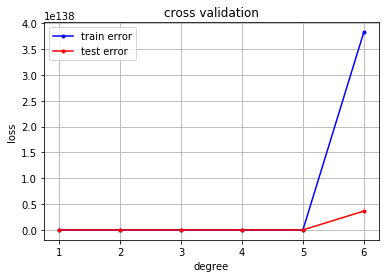

In [62]:
# ------------------------------- BUILD THE MODEL WITH THE SELECTED FEATURES 
X = X0[:,idx_features]

# Set parameters
model['initial_w'] = np.zeros(X.shape[1])
#model['debug_mode'] = 1
deg_min = 1
deg_max = 7
deg_steps = 1


w_tr_tot, loss_tr_tot, loss_te_tot, deg_opt, success_rate  = optimize_degree(y, X, deg_min, deg_max, deg_steps, model, debug_mode=1)


In [63]:
mean_tr = np.mean(loss_tr_tot)
mean_te = np.mean(loss_te_tot)
var_tr = np.var(loss_tr_tot)
var_te = np.var(loss_te_tot)

print("TRAINING:")
print('Mean = ', mean_tr, ' | Var = ', var_tr)
print('---------------------------------------------------')
print("TESTING:")
print('Mean = ', mean_te, ' | Var = ', var_te)
print('\n')
print("Success Rate : ", success_rate)

TRAINING:
Mean =  0.441602265586  | Var =  0.0
---------------------------------------------------
TESTING:
Mean =  0.441701968785  | Var =  0.0


Success Rate :  0.533048


In [64]:
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0